In [2]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.graphics.api import qqplot
%matplotlib inline

In [3]:
df = pd.read_csv("Cryogenic Storage Tank Sales data.xlsx - Cryogenic sales data.csv")
df.head()

,Row ID,Order ID,Ship Date,month_Year,Year,Ship Mode,Customer ID,Customer Name,Segment,Country,...,State,Postal Code,Region,Product ID,Product name,Sales in Thousands,Quantity,Discount,Profit,month
0,1,CA-2016-152156,11-11-2022,2022-11,2022.0,Second Class,CG-12520,Claire Gute,Consumer,United States,...,Kentucky,42420,South,FUR-BO-10001798,Cryogenic storage tanks,261.9600,2,0.00,41.9136,11
1,2,CA-2016-152156,11-11-2022,2022-11,2022.0,Second Class,CG-12520,Claire Gute,Consumer,United States,...,Kentucky,42420,South,FUR-CH-10000454,Cryogenic storage tanks,731.9400,3,0.00,219.5820,11
2,3,CA-2016-138688,16-06-2022,2022-06,2022.0,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,...,California,90036,West,OFF-LA-10000240,Cryogenic storage tanks,14.6200,2,0.00,6.8714,6
3,4,US-2015-108966,18-10-2021,2021-10,2021.0,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,Florida,33311,South,FUR-TA-10000577,Cryogenic storage tanks,957.5775,5,0.45,-383.0310,10
4,5,US-2015-108966,18-10-2021,2021-10,2021.0,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,Florida,33311,South,OFF-ST-10000760,Cryogenic storage tanks,22.3680,2,0.20,2.5164,10


In [4]:
df.rename(columns={"Sales in Thousands":"sales"},inplace=True)
df.rename(columns={"Ship Date":"Date"},inplace=True)

In [5]:
df1 = df[["sales",'Date']]
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sales   9994 non-null   float64
 1   Date    9994 non-null   object 
dtypes: float64(1), object(1)
memory usage: 156.3+ KB


In [6]:
df1.Date = pd.to_datetime(df1.Date)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   sales   9994 non-null   float64       
 1   Date    9994 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 156.3 KB


In [8]:
df1

,sales,Date
0,261.9600,2022-11-11
1,731.9400,2022-11-11
2,14.6200,2022-06-16
3,957.5775,2021-10-18
4,22.3680,2021-10-18
...,...,...
9989,25.2480,2020-01-23
9990,91.9600,2023-03-03
9991,258.5760,2023-03-03
9992,29.6000,2023-03-03


In [9]:
df1 = df1.set_index("Date")

In [10]:
df1

,sales
Date,
2022-11-11,261.9600
2022-11-11,731.9400
2022-06-16,14.6200
2021-10-18,957.5775
2021-10-18,22.3680
...,...
2020-01-23,25.2480
2023-03-03,91.9600
2023-03-03,258.5760


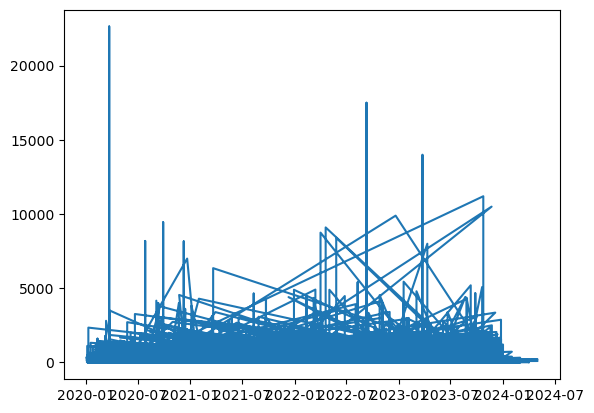

In [11]:
import matplotlib.pyplot as plt
plt.plot(df1['sales'])

In [87]:
sales_by_month = df1.groupby('Date')['sales'].sum()
sales_by_month.shape

(1334,)

In [13]:
sales_by_month_df = sales_by_month.reset_index()

# Rename the columns
sales_by_month_df.columns = ['Date', 'sales']

print(type(sales_by_month_df))

<class 'pandas.core.frame.DataFrame'>


In [14]:
sales_by_month_df = sales_by_month_df.set_index("Date")

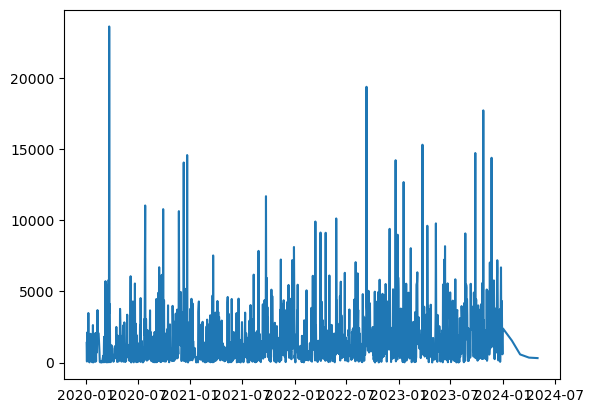

In [15]:
plt.plot(sales_by_month_df['sales'])

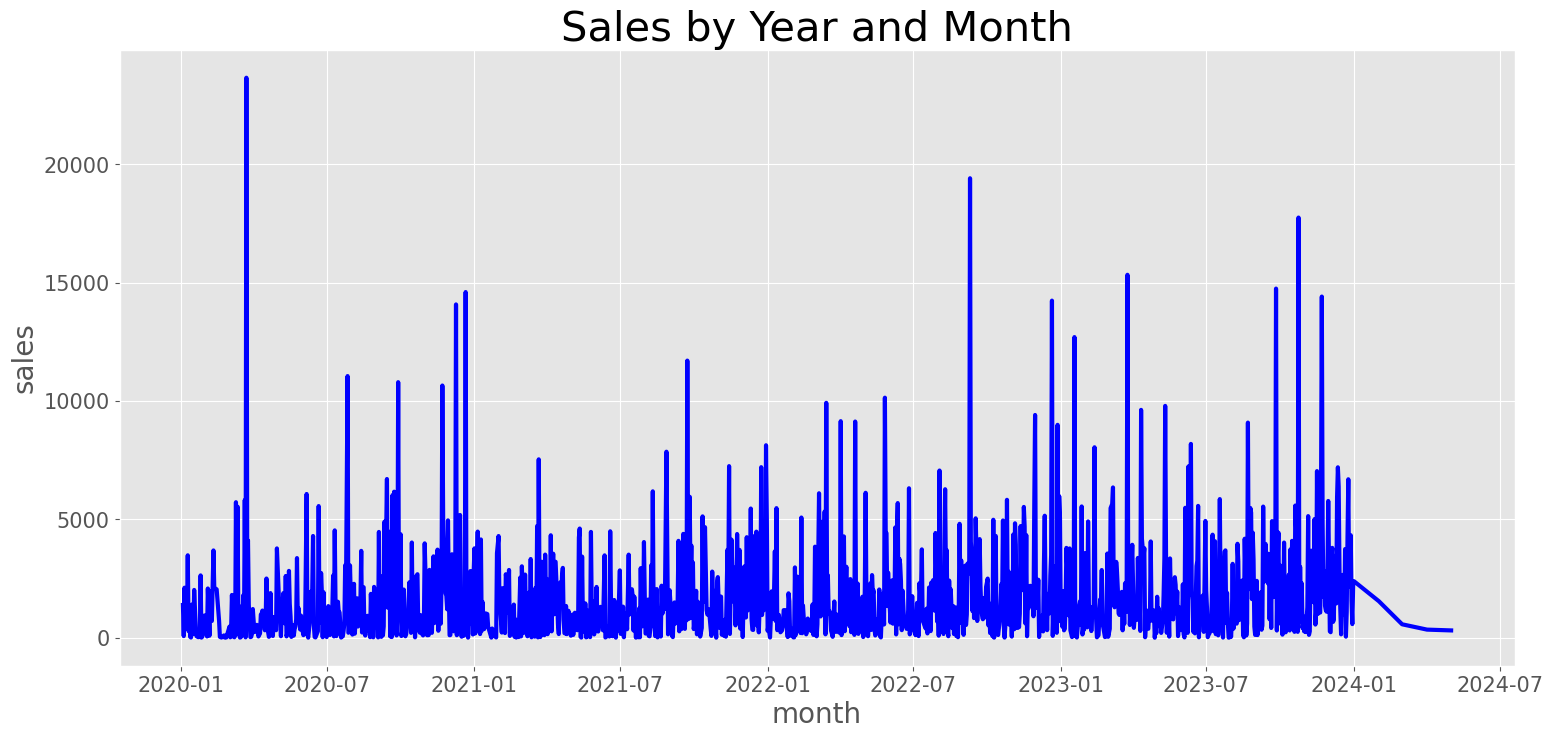

In [18]:
# plotting sales 
plt.style.use('ggplot')
plt.figure(figsize=(18,8)) 
plt.grid(True) 
plt.xlabel('month', fontsize = 20) 
plt.xticks(fontsize = 15)
plt.ylabel('sales', fontsize = 20)
plt.yticks(fontsize = 15) 
plt.plot(sales_by_month_df['sales'], linewidth = 3, color = 'blue')
plt.title('Sales by Year and Month', fontsize = 30)
plt.show()

<AxesSubplot:xlabel='sales', ylabel='Density'>

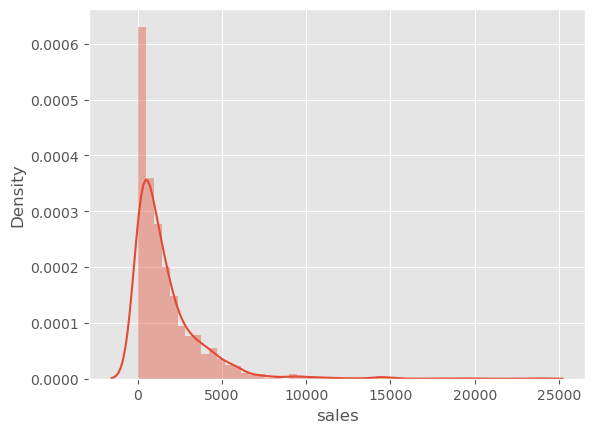

In [19]:
import seaborn as sns
sns.distplot(sales_by_month_df['sales'])

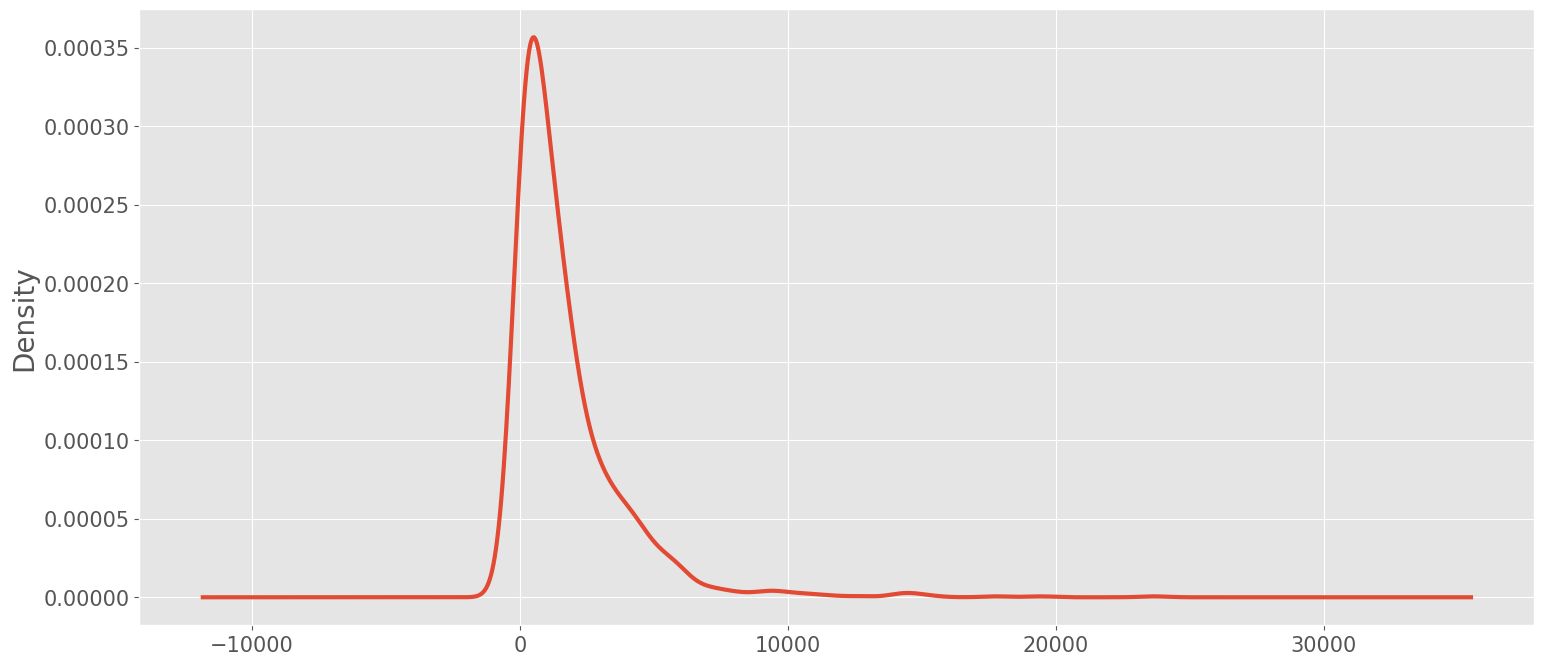

In [20]:
df_sales = sales_by_month_df['sales'] 
df_sales.plot(kind='kde',figsize = (18,8), linewidth= 3) 
plt.xticks(fontsize = 15)
plt.grid("both")
plt.ylabel('Density', fontsize = 20)
plt.yticks(fontsize = 15)
plt.show()

In [24]:
np.mean(sales_by_month_df['sales'].head(10))

988.8606

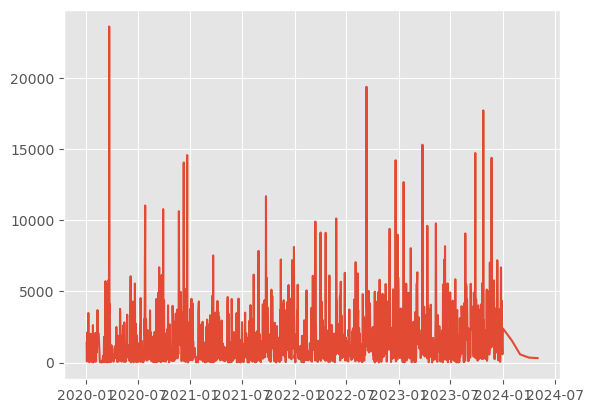

In [25]:
plt.plot(sales_by_month_df['sales'])

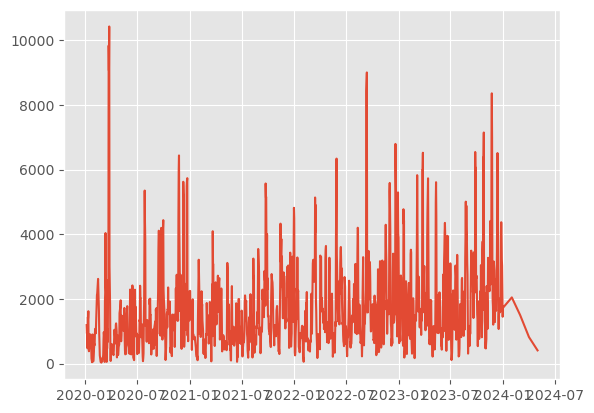

In [26]:
plt.plot(sales_by_month_df['sales'].rolling(3).mean())

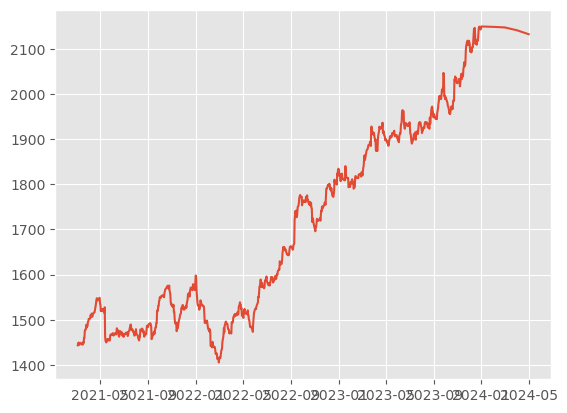

In [27]:
plt.plot(sales_by_month_df['sales'].rolling(365).mean())

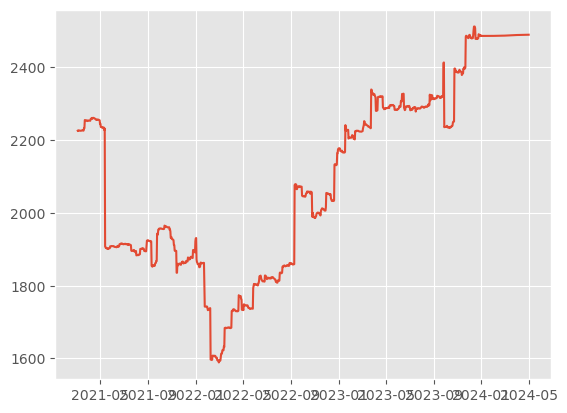

In [28]:
plt.plot(sales_by_month_df['sales'].rolling(365).std())

In [29]:
adfuller(sales_by_month_df['sales'],autolag='AIC')

(-18.550215811899662,
 2.09285273206523e-30,
 2,
 1331,
 {'1%': -3.4352725818242713,
  '5%': -2.8637139321325344,
  '10%': -2.5679274082969763},
 23857.032081562713)

In [30]:
#Test for staionarity
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(12).mean() # rolling mean
    rolstd = timeseries.rolling(12).std() # rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

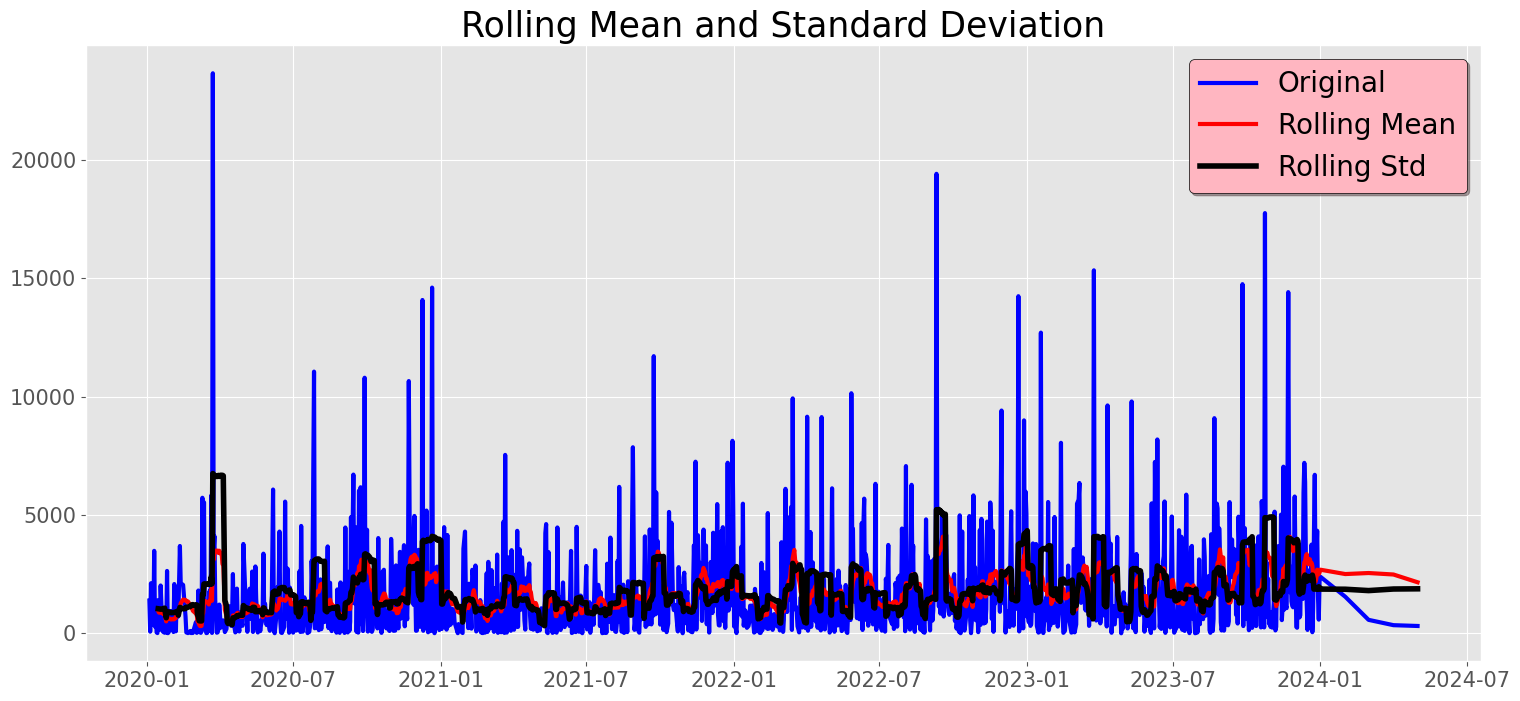

Results of dickey fuller test
Test Statistics               -1.855022e+01
p-value                        2.092853e-30
No. of lags used               2.000000e+00
Number of observations used    1.331000e+03
critical value (1%)           -3.435273e+00
critical value (5%)           -2.863714e+00
critical value (10%)          -2.567927e+00
dtype: float64


In [31]:
test_stationarity(sales_by_month_df['sales'])

In [32]:
df_saless = sales_by_month_df['sales']

In [34]:
df_saless.diff(1)

Date
2020-01-04          NaN
2020-01-05   -1314.2280
2020-01-06    2046.0480
2020-01-07   -1499.8080
2020-01-08    -247.7300
                ...    
2024-01-01     187.6928
2024-02-01    -844.5308
2024-03-01    -976.3500
2024-04-01    -225.0500
2024-05-01     -33.8040
Name: sales, Length: 1334, dtype: float64

In [36]:
df_sales_diff_1 = df_saless.diff(1)

In [37]:
df_sales_diff_1.dropna(inplace=True)

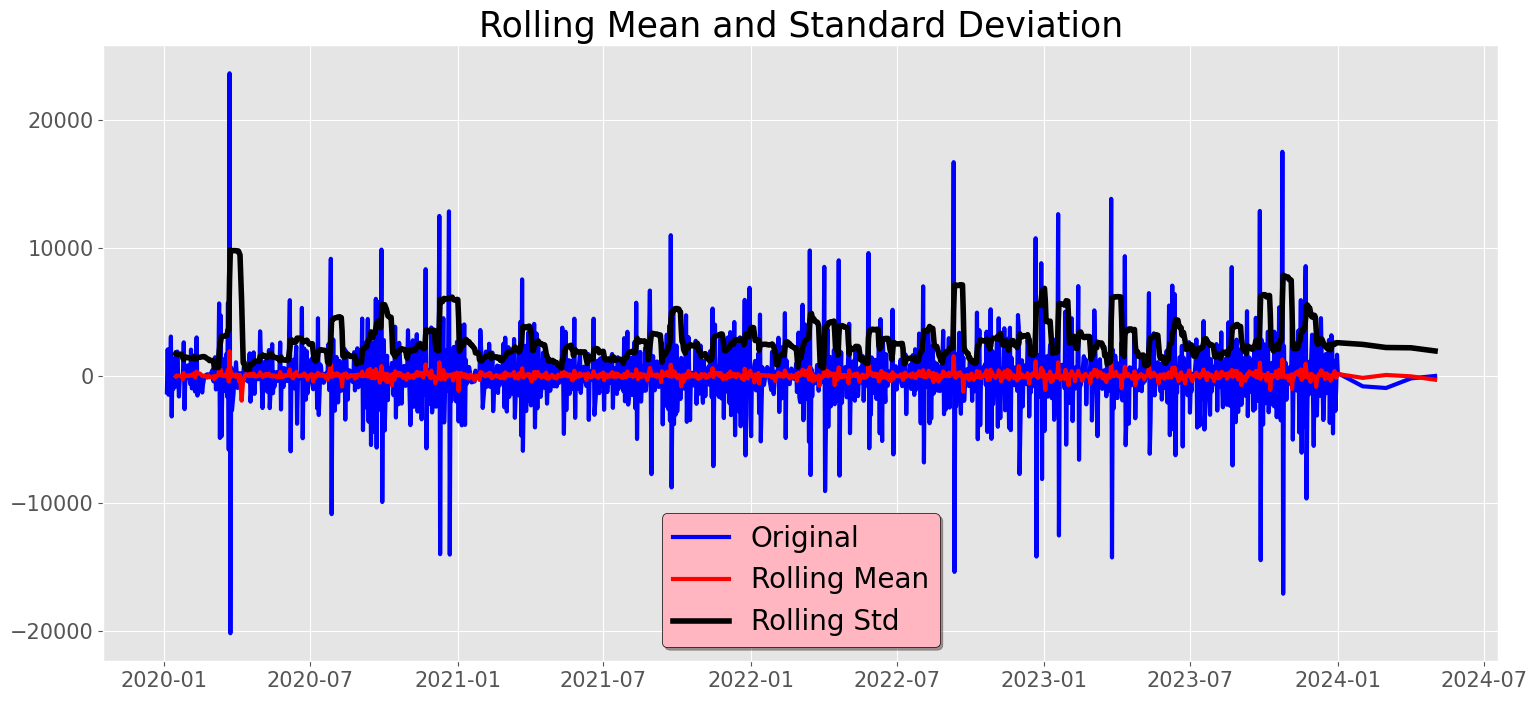

Results of dickey fuller test
Test Statistics               -1.596393e+01
p-value                        7.127194e-29
No. of lags used               1.600000e+01
Number of observations used    1.316000e+03
critical value (1%)           -3.435329e+00
critical value (5%)           -2.863739e+00
critical value (10%)          -2.567941e+00
dtype: float64


In [38]:
test_stationarity(df_sales_diff_1)

In [41]:
result=seasonal_decompose(sales_by_month_df[["sales"]],model='additive',period=356)

<Figure size 2000x1000 with 0 Axes>

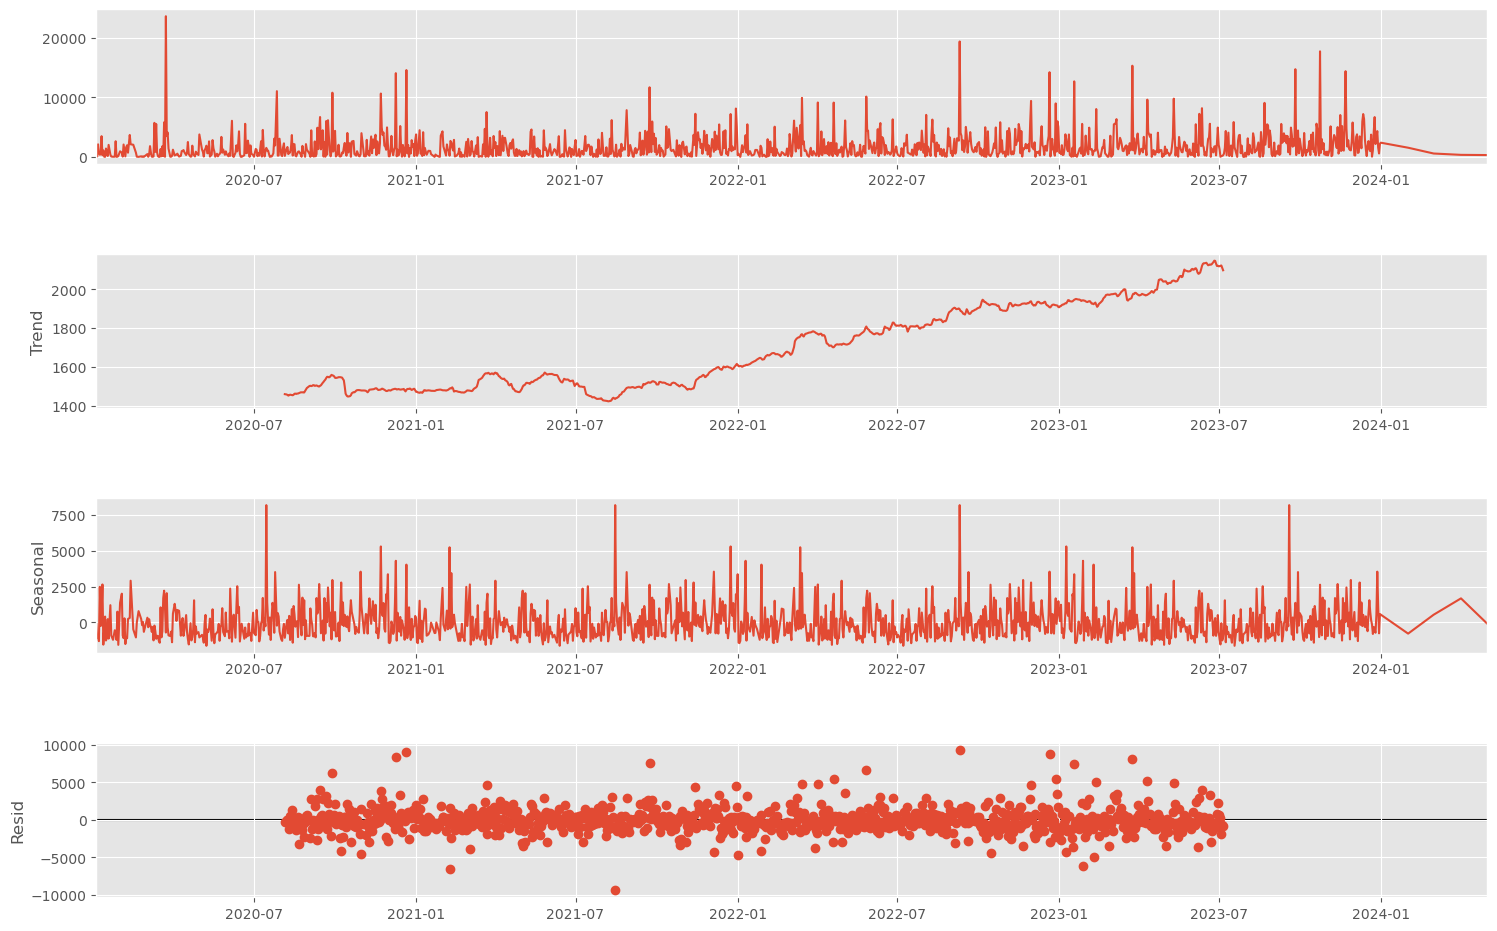

In [42]:
fig=plt.figure(figsize=(20,10))
fig=result.plot()
fig.set_size_inches(17,10)

In [44]:
result1=seasonal_decompose(sales_by_month_df[["sales"]],model='multiplicative',period=365)

<Figure size 2000x1000 with 0 Axes>

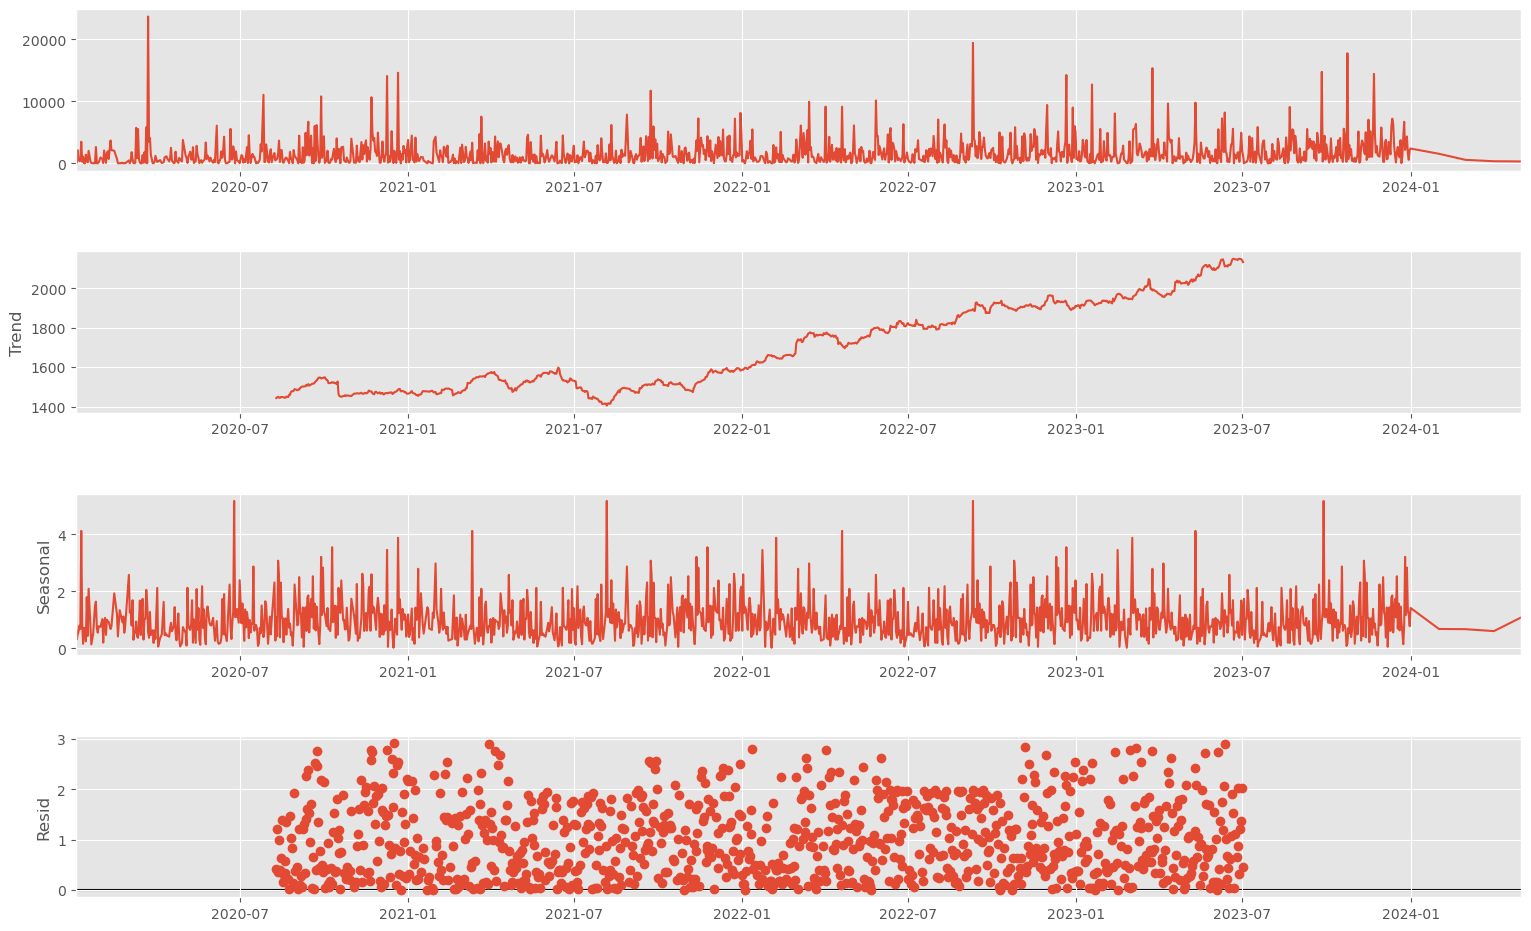

In [45]:
fig=plt.figure(figsize=(20,10))
fig=result1.plot()
fig.set_size_inches(17,10)

In [88]:
train_data=sales_by_month_df[0:1000]
train_data.shape

(1000, 1)

In [90]:
test_data=sales_by_month_df[1000:]
test_data.shape

(334, 1)

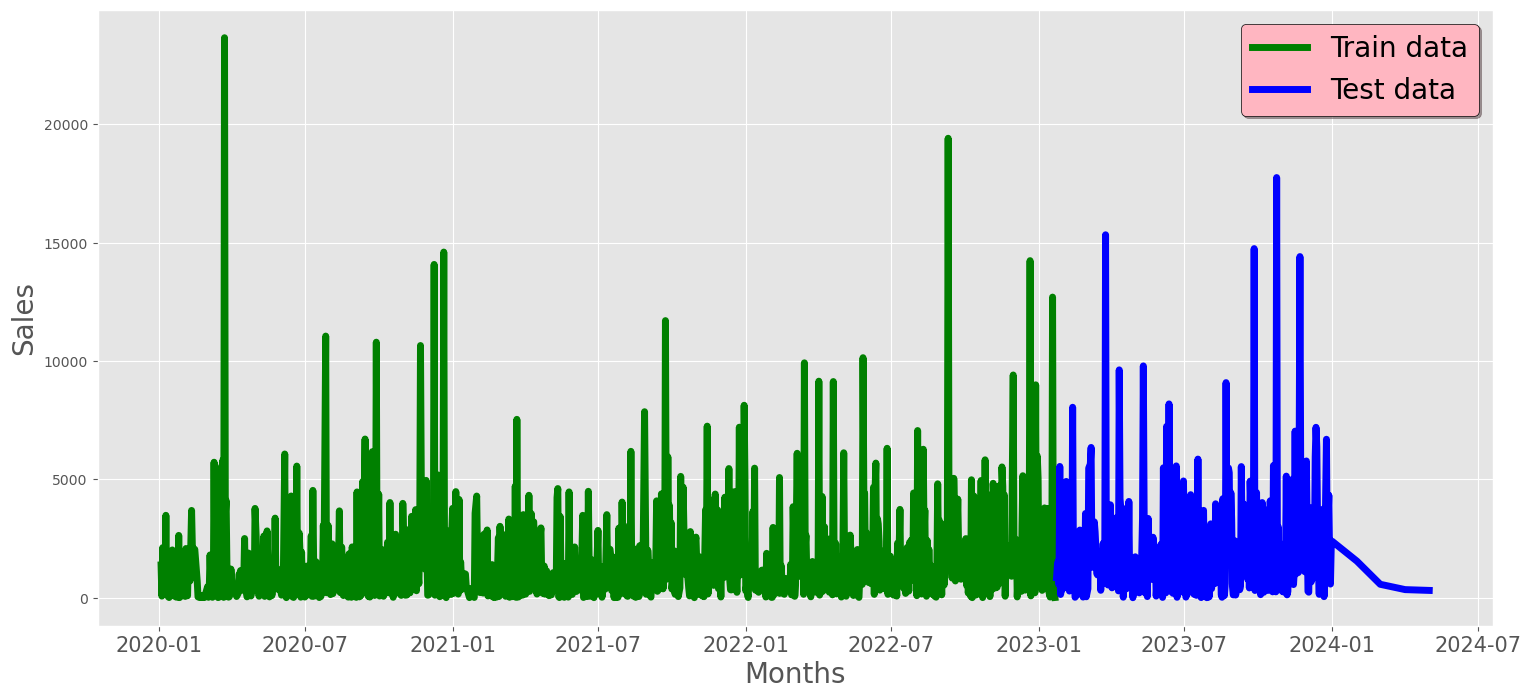

In [91]:
train_data=train_data
test_data=test_data
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Months', fontsize = 20)
plt.ylabel('Sales', fontsize = 20)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.plot(train_data, 'green', label='Train data', linewidth = 5)
plt.plot(test_data, 'blue', label='Test data', linewidth = 5)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')

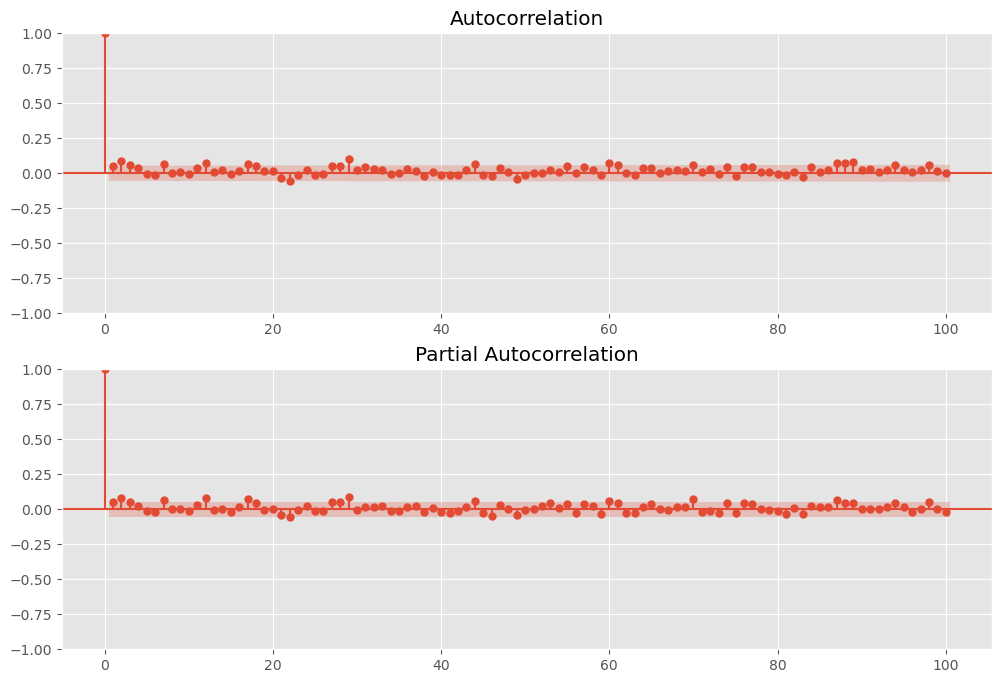

In [140]:
sales_data = sales_by_month_df['sales'].values
# show plots in the notebook
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(sales_data.squeeze(), lags=100, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(sales_data, lags=100, ax=ax2)

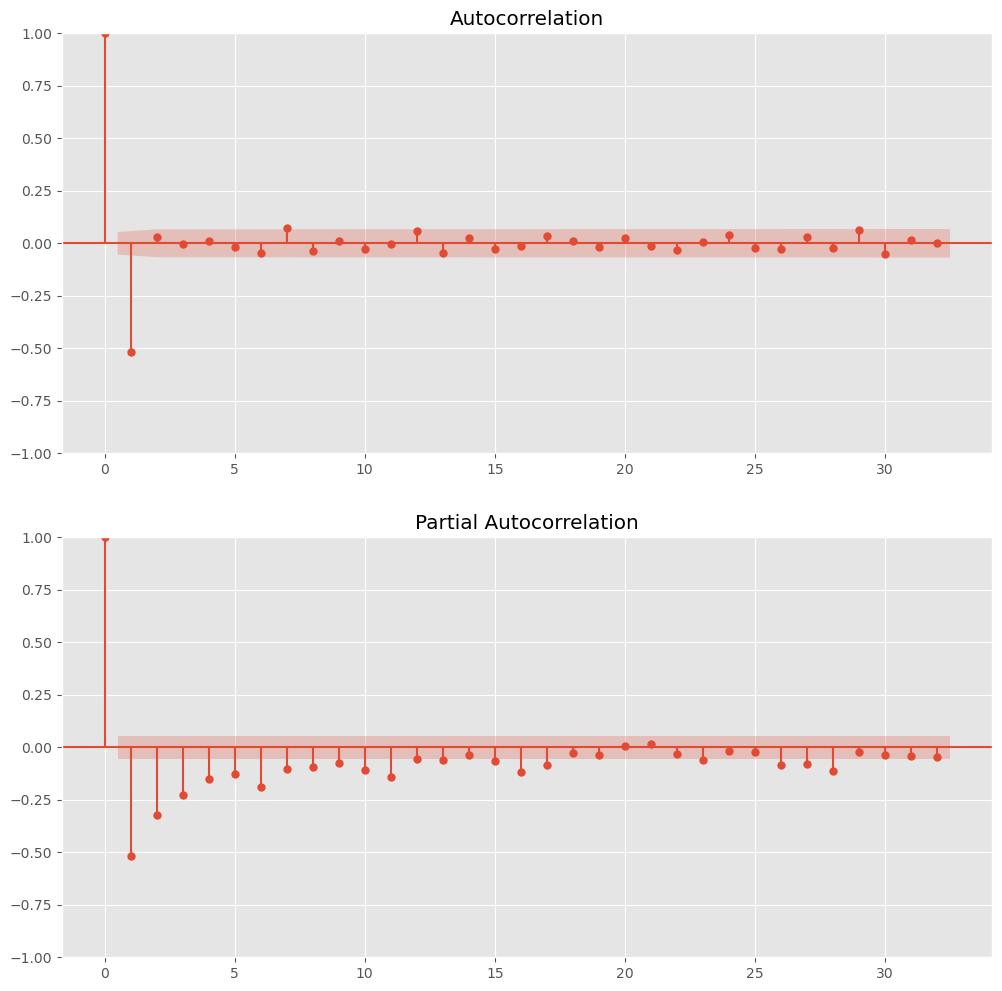

In [93]:
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(211)#function
fig = plot_acf(df_sales_diff_1, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df_sales_diff_1, ax=ax2)

In [144]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot as plt
from pandas import read_csv
from pandas import datetime 
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt
predictions = list()
conf_list = list()
model1 = ARIMA(train_data['sales'], order=(2,1,2))
model_fit1 = model1.fit()
forecast_length = len(test_data)
output1= model_fit1.forecast(steps=forecast_length)



output1

1000    1834.655901
1001    1786.954585
1002    1930.016383
1003    1961.203220
1004    1981.032864
           ...     
1329    1994.813650
1330    1994.813650
1331    1994.813650
1332    1994.813650
1333    1994.813650
Name: predicted_mean, Length: 334, dtype: float64

In [145]:
summary = model_fit1.summary()

In [146]:
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:                 1000
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -9049.487
Date:                Fri, 01 Mar 2024   AIC                          18108.974
Time:                        22:05:20   BIC                          18133.508
Sample:                             0   HQIC                         18118.299
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2463      0.419      0.588      0.557      -0.575       1.068
ar.L2          0.0849      0.037      2.289      0.022       0.012       0.158
ma.L1         -1.2243      0.421     -2.906      0.004      -2.050      -0.399
ma.L2          0.2305      0.417      0.553      0.580      -0.587       1.048
sigma2      4.308e+06   7.13e+04     60.382      0.000    4.17e+06    4.45e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             26353.21
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                             3.75
Prob(H) (two-sided):                  0.86   Kurtosis:                        27.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [147]:
y_true = test_data['sales'].values
y_true.shape

(334,)

In [148]:
y_pred = output1[:forecast_length]
y_pred.shape

(334,)

In [149]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse}')
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 5606041.025861818
Root Mean Squared Error: 2367.7079688723898
